In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
# Data from the tables
metrics = ['Precision', 'Recall', 'H-Mean']

# EAST data
east_data = {
    'Pre-trained': [12.07, 25.39, 16.36],
    'Fine-tuned on syn., validate on real data': [44.95, 69.42, 54.57,],
    'Fine-tuned on syn., validate on syn. data': [39.50, 64.54, 49.01,],
    'Optimized with real data': [85.19, 90.28, 87.66],
    'Fine-tuned on mixed data': [91.51, 93.74, 92.61],
    'Fine-tuned on real data': [89.87, 92.71, 91.27]
}

# DB data
db_data = {
    'Pre-trained': [27.00, 42.61, 33.05],
    'Fine-tuned on syn., validate on real data': [90.61, 70.55, 80.33],
    'Fine-tuned on syn., validate on syn. data': [87.15, 70.02, 77.65],
    'Optimized with real data': [96.25, 81.48, 88.25],
    'Fine-tuned on mixed data': [95.02, 97.04, 96.03],
    'Fine-tuned on real data': [97.38, 81.79, 88.90]
}



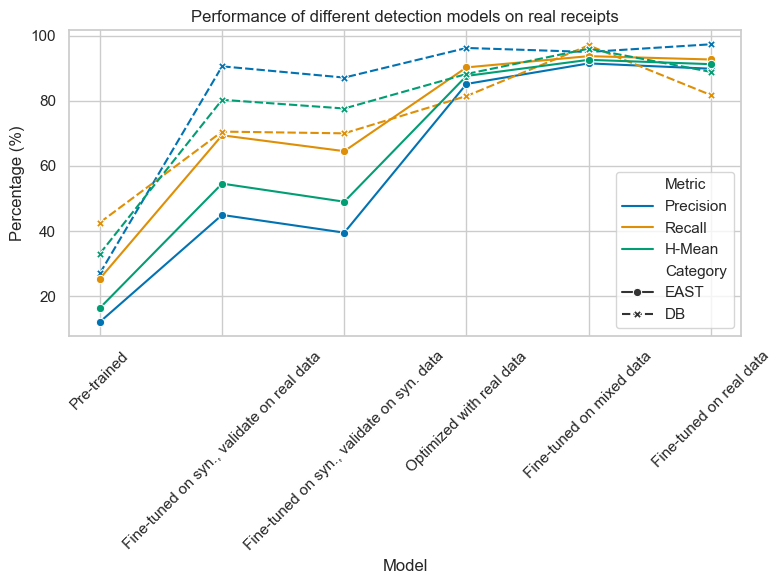

In [17]:
data = []

for model, values in east_data.items():
    data.append({'Model': model, 'Metric': 'Precision', 'Value': values[0], 'Category': 'EAST'})
    data.append({'Model': model, 'Metric': 'Recall', 'Value': values[1], 'Category': 'EAST'})
    data.append({'Model': model, 'Metric': 'H-Mean', 'Value': values[2], 'Category': 'EAST'})

for model, values in db_data.items():
    data.append({'Model': model, 'Metric': 'Precision', 'Value': values[0], 'Category': 'DB'})
    data.append({'Model': model, 'Metric': 'Recall', 'Value': values[1], 'Category': 'DB'})
    data.append({'Model': model, 'Metric': 'H-Mean', 'Value': values[2], 'Category': 'DB'})

df = pd.DataFrame(data)

# Plotting line chart with Seaborn
plt.figure(figsize=(8, 6))

sns.lineplot(x='Model', y='Value', hue='Metric', style='Category', data=df, markers=True, palette='colorblind')
plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.title('Performance of different detection models on real receipts')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/5f/9rrc_w815mq5hv8h9nnytfp00000gn/T/ipykernel_9346/3594693950.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/5f/9rrc_w815mq5hv8h9nnytfp00000gn/T/ipykernel_9346/3594693950.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



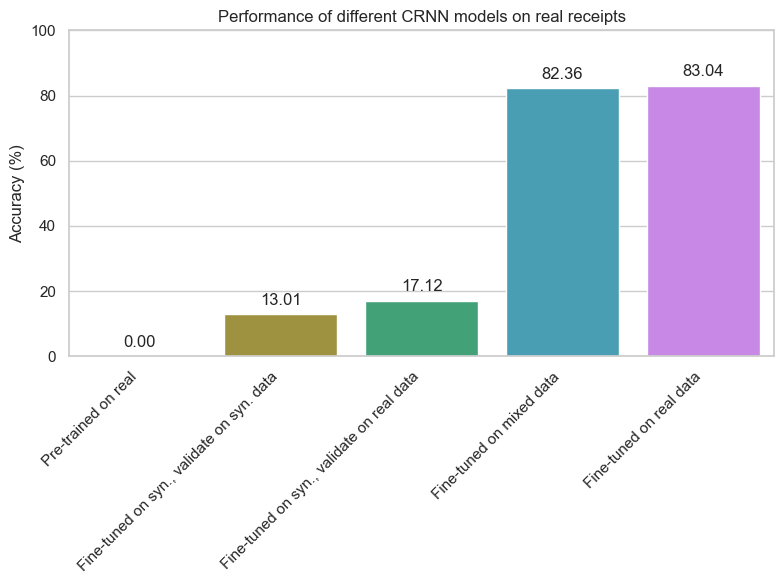

In [15]:
metrics_crnn = ['Accuracy']

crnn_data = {
    'Pre-trained on real': [0.00],  # Accuracy, FPS
    'Fine-tuned on syn., validate on syn. data': [13.01],
    "Fine-tuned on syn., validate on real data": [17.12],
    'Fine-tuned on mixed data': [82.36],
    'Fine-tuned on real data': [83.04]
}
# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with Seaborn
plt.figure(figsize=(8, 6))

# Plotting the bar chart with Seaborn
ax = sns.barplot(x=list(crnn_data.keys()), y=list(np.concatenate(list(crnn_data.values()))), palette='husl')

# Adding exact values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Performance of different CRNN models on real receipts')

plt.ylim(0, 100)  # Adjusted ylim for better visualization

plt.tight_layout()
plt.show()